## Some Basic EDA on Extracted Data from Resumes

In [1]:
import numpy as np
import pandas as pd

import re
import string # for text cleaning
import contractions # for expanding short form words
from tqdm import tqdm
tqdm.pandas(desc="Progress Bar")

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./pdf_extracted_skills_education.csv')
df.head()

,Skills,Education,ID,Category
0,Accounting; General Accounting; Accounts Payab...,Northern Maine Community College 1994 Associat...,10554236,ACCOUNTANT
1,"accounting, accounts payable, Accounts Receiva...","Bachelor of Science : Accounting , May 2010 Un...",10674770,ACCOUNTANT
2,"accounts payables, accounts receivables, Accou...",Computer Applications Specialist Certificate P...,11163645,ACCOUNTANT
3,"accounting, balance sheet, budgets, client, cl...","EMORY UNIVERSITY, Goizueta Business School 5 2...",11759079,ACCOUNTANT
4,Aderant/CMS Financial reporting,Bachelor of Business Administration : Accounti...,12065211,ACCOUNTANT


In [3]:
# We have 2484 resumes with us
df.shape

(2484, 4)

### Analyzing Null Values

In [4]:
# Null values
df.isna().sum()

# It seems that Education was not extracted properly

Skills        91
Education    590
ID             0
Category       0
dtype: int64

In [5]:
# We have 15 Resumes where Skills & Education were not extracted
# So, let's remove them

print(df[(df.Skills.isna() & df.Education.isna())])

     Skills Education        ID                Category
145     NaN       NaN  17021141                ADVOCATE
367     NaN       NaN  31225895                 APPAREL
407     NaN       NaN  14248724                    ARTS
802     NaN       NaN  12632728    BUSINESS-DEVELOPMENT
1047    NaN       NaN  14849103            CONSTRUCTION
1270    NaN       NaN  14014749                DESIGNER
1357    NaN       NaN  90066849                DESIGNER
1492    NaN       NaN  20566550             ENGINEERING
1723    NaN       NaN  17576030                 FITNESS
1738    NaN       NaN  21178545                 FITNESS
1802    NaN       NaN  77266989                 FITNESS
1829    NaN       NaN  15499825              HEALTHCARE
2078    NaN       NaN  20237244  INFORMATION-TECHNOLOGY
2116    NaN       NaN  29051656  INFORMATION-TECHNOLOGY
2290    NaN       NaN  16280971                   SALES


In [6]:
# We are left with 2469 resumes after removing those 15 resumes with null data in both of them

print(df[~(df['Skills'].isna() & df['Education'].isna())].shape)

cv_df = df[~(df['Skills'].isna() & df['Education'].isna())].reset_index(drop=True)
cv_df.head()

(2469, 4)


,Skills,Education,ID,Category
0,Accounting; General Accounting; Accounts Payab...,Northern Maine Community College 1994 Associat...,10554236,ACCOUNTANT
1,"accounting, accounts payable, Accounts Receiva...","Bachelor of Science : Accounting , May 2010 Un...",10674770,ACCOUNTANT
2,"accounts payables, accounts receivables, Accou...",Computer Applications Specialist Certificate P...,11163645,ACCOUNTANT
3,"accounting, balance sheet, budgets, client, cl...","EMORY UNIVERSITY, Goizueta Business School 5 2...",11759079,ACCOUNTANT
4,Aderant/CMS Financial reporting,Bachelor of Business Administration : Accounti...,12065211,ACCOUNTANT


In [7]:
# New number of null values in Skills & Education Section
cv_df.isna().sum()

Skills        76
Education    575
ID             0
Category       0
dtype: int64

In [8]:
# Null values in Skills Section
cv_df[cv_df.Skills.isna()]

,Skills,Education,ID,Category
7,NaN,"Bachelor of Science , Accounting Strayer Unive...",12442909,ACCOUNTANT
23,NaN,University of Phoenix Masters of Business Admi...,15363277,ACCOUNTANT
46,NaN,"Masters , Accounting University of Florida ï¼​...",21794875,ACCOUNTANT
76,NaN,High School Diploma : Business Management/Acco...,27637576,ACCOUNTANT
115,NaN,Bachelor of Arts : Economics City College of N...,82649935,ACCOUNTANT
...,...,...,...,...
2242,NaN,Master of Journalism : PR/Integrated Communica...,59346975,PUBLIC-RELATIONS
2245,NaN,B.A : Marketing June 2005 Berkeley College Mar...,75329822,PUBLIC-RELATIONS
2387,NaN,Plans.\nApplied progressive teaching principle...,17481570,TEACHER
2417,NaN,"Ph.D. : Philosophy in Education , 2019\nNorthc...",27126818,TEACHER


In [9]:
# Null values in Education Section
cv_df[cv_df.Education.isna()]

,Skills,Education,ID,Category
11,Budget forecasting expertise General ledger ac...,NaN,13130984,ACCOUNTANT
13,Full Accounting cycle Auditing,NaN,13491889,ACCOUNTANT
20,"account reconciliations, Accounting, accruals,...",NaN,14491649,ACCOUNTANT
29,"Accounting, billing, Change Management, contra...",NaN,17407184,ACCOUNTANT
31,Analytical reasoning Effective time management,NaN,18132924,ACCOUNTANT
...,...,...,...,...
2442,"Anatomy, Arts, EMR software, front office, inj...",NaN,37402097,TEACHER
2446,Behavior modeling Troubleshooting,NaN,45987048,TEACHER
2453,"Computer literate, drivers, listening, natural...",NaN,58708773,TEACHER
2458,â€¢ Well versed with the standards of hygiene ...,NaN,69005326,TEACHER


### Distribution of Different Resumes

In [10]:
cv_df.Category.value_counts()

Category
BUSINESS-DEVELOPMENT      119
ACCOUNTANT                118
INFORMATION-TECHNOLOGY    118
FINANCE                   118
CHEF                      118
ENGINEERING               117
AVIATION                  117
ADVOCATE                  117
SALES                     115
CONSULTANT                115
BANKING                   115
FITNESS                   114
HEALTHCARE                114
CONSTRUCTION              111
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  105
ARTS                      102
TEACHER                   102
DIGITAL-MEDIA              96
APPAREL                    96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

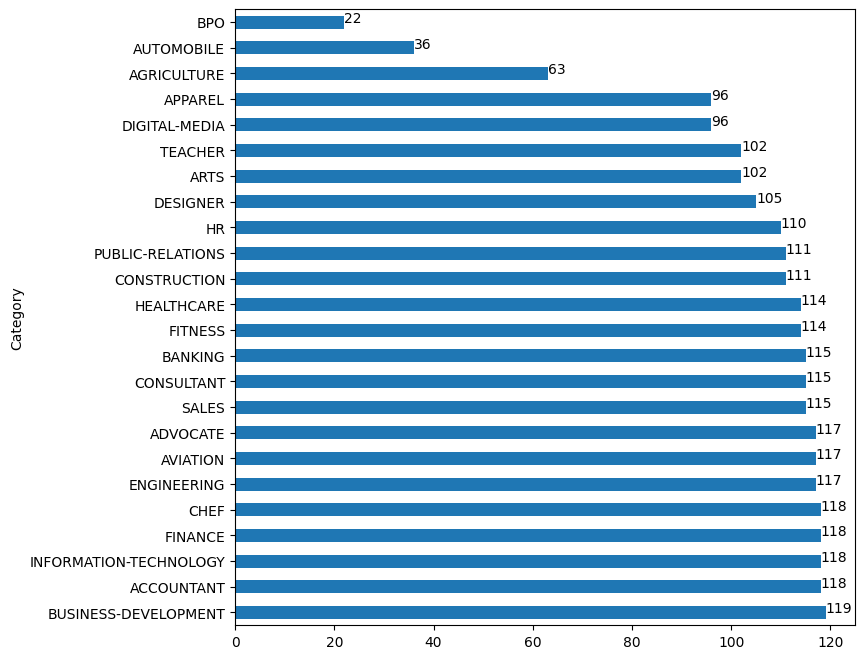

In [11]:
# We can see here the distribution of different CV categories

plt.figure(figsize=(8,8))

cv_df.Category.value_counts().plot(kind='barh')

for index, value in enumerate(cv_df.Category.value_counts().values):
    plt.text(value, index, str(value))
    
plt.show();

### EDA on text data

Let's do some basic text cleaning & see some text statistics

In [12]:
def text_cleaning(text:str) -> str:
    if pd.isnull(text):
        return
    
    # lower-case everything
    text = text.lower().strip()
    
    # For removing puctuations
    translator = str.maketrans('', '', string.punctuation)
    
    # expand all the short-form words
    text = contractions.fix(text)
    
    # remove any special chars
    text = re.sub(r'http\S+|www\S+|https\S+', '', text) # Remove URLs
    text = re.sub(r'\S+@\S+', '', text) # Remove emails
    text = re.sub(r'\b\d{1,3}[-./]?\d{1,3}[-./]?\d{1,4}\b', '', text) # Remove phone numbers
    text = text.translate(translator) # Remove puctuations
    text = re.sub(r'[^a-zA-Z]', ' ', text) # Remove other non-alphanumeric characters
    
    return text.strip()

In [13]:
# Let's stitch together Skills & Education, similar to given in job description.
resume_df = cv_df.copy()

# Filling the null values in Skills & Education with Empty String before concatinating them
resume_df = resume_df.fillna(value='')

resume_df['CV'] = resume_df['Skills'] + ' ' + resume_df['Education']
resume_df['CV'] = resume_df['CV'].progress_apply(text_cleaning)

Progress Bar: 100%|██████████████████████████████████████████████████████████████| 2469/2469 [00:00<00:00, 9292.03it/s]


In [14]:
resume_df.head()

,Skills,Education,ID,Category,CV
0,Accounting; General Accounting; Accounts Payab...,Northern Maine Community College 1994 Associat...,10554236,ACCOUNTANT,accounting general accounting accounts payable...
1,"accounting, accounts payable, Accounts Receiva...","Bachelor of Science : Accounting , May 2010 Un...",10674770,ACCOUNTANT,accounting accounts payable accounts receivabl...
2,"accounts payables, accounts receivables, Accou...",Computer Applications Specialist Certificate P...,11163645,ACCOUNTANT,accounts payables accounts receivables account...
3,"accounting, balance sheet, budgets, client, cl...","EMORY UNIVERSITY, Goizueta Business School 5 2...",11759079,ACCOUNTANT,accounting balance sheet budgets client client...
4,Aderant/CMS Financial reporting,Bachelor of Business Administration : Accounti...,12065211,ACCOUNTANT,aderantcms financial reporting bachelor of bus...


### Analyzing Mean Word length(and Percentile wise) in CVs by their Category

In [28]:
# Here (x-percentile = y) means that, that x% of words have 
# in the whole corpus have length less than or equal to y in the corpus of text we have

# for category in resume_df.Category.unique():
#     category_wise_cv = resume_df[resume_df.Category==category]['CV']
#     print(f"{category}")
#     print(category_wise_cv.str.split().str.len().describe(percentiles=[0.05,0.5,0.8,0.9,0.95]), end='\n\n')

# SAME THING IS DONE BELOW, FOR BETTER visualization

In [16]:
category_stats = []

for category in resume_df['Category'].unique():
    category_wise_cv = resume_df[resume_df['Category'] == category]['CV']
    stats = category_wise_cv.str.split().str.len().describe(percentiles=[0.05, 0.5, 0.8, 0.9, 0.95])
    category_stats.append({'Category': category, **stats.to_dict()})

stats_df = pd.DataFrame(category_stats)

# Display the resulting DataFrame
stats_df

,Category,count,mean,std,min,5%,50%,80%,90%,95%,max
0,ACCOUNTANT,118.0,53.762712,77.190372,1.0,3.85,37.5,72.0,92.0,113.95,710.0
1,ADVOCATE,117.0,50.632479,60.125816,2.0,3.00,37.0,69.8,89.4,137.80,532.0
2,AGRICULTURE,63.0,95.619048,160.796649,2.0,6.20,51.0,110.0,153.2,297.80,985.0
3,APPAREL,96.0,50.364583,107.048451,1.0,3.00,34.0,59.0,77.0,102.75,1049.0
4,ARTS,102.0,101.333333,164.892424,1.0,5.05,50.5,106.6,156.6,482.75,893.0
5,AUTOMOBILE,36.0,39.916667,29.792017,0.0,2.50,35.5,64.0,71.0,98.00,115.0
6,AVIATION,117.0,71.871795,112.382777,2.0,3.00,41.0,86.6,147.8,269.80,879.0
7,BANKING,115.0,77.539130,159.677377,3.0,7.00,46.0,79.2,105.6,222.00,1487.0
8,BPO,22.0,53.818182,35.653940,2.0,14.05,48.5,71.2,87.9,121.25,156.0
9,BUSINESS-DEVELOPMENT,119.0,49.126050,37.023253,1.0,3.00,40.0,81.2,103.2,121.40,183.0


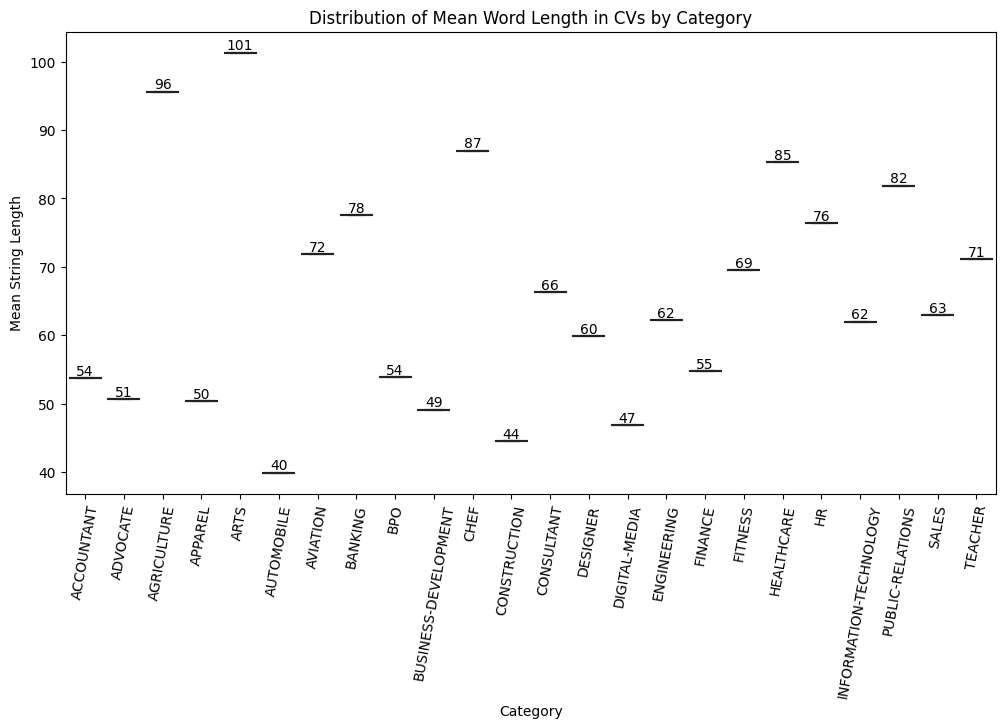

In [17]:
# Create a box plot to visualize the distribution of string lengths for each category
plt.figure(figsize=(12, 6))
sns.boxplot(data=stats_df, x='Category', y='mean', palette='viridis')

# Annotate the bars with actual values
for index, row in stats_df.iterrows():
    plt.text(index, row['mean'], f'{round(row["mean"])}', ha='center', va='bottom', fontsize=10)

plt.title('Distribution of Mean Word Length in CVs by Category')
plt.xticks(rotation=80)
plt.xlabel('Category')
plt.ylabel('Mean String Length')
plt.show();

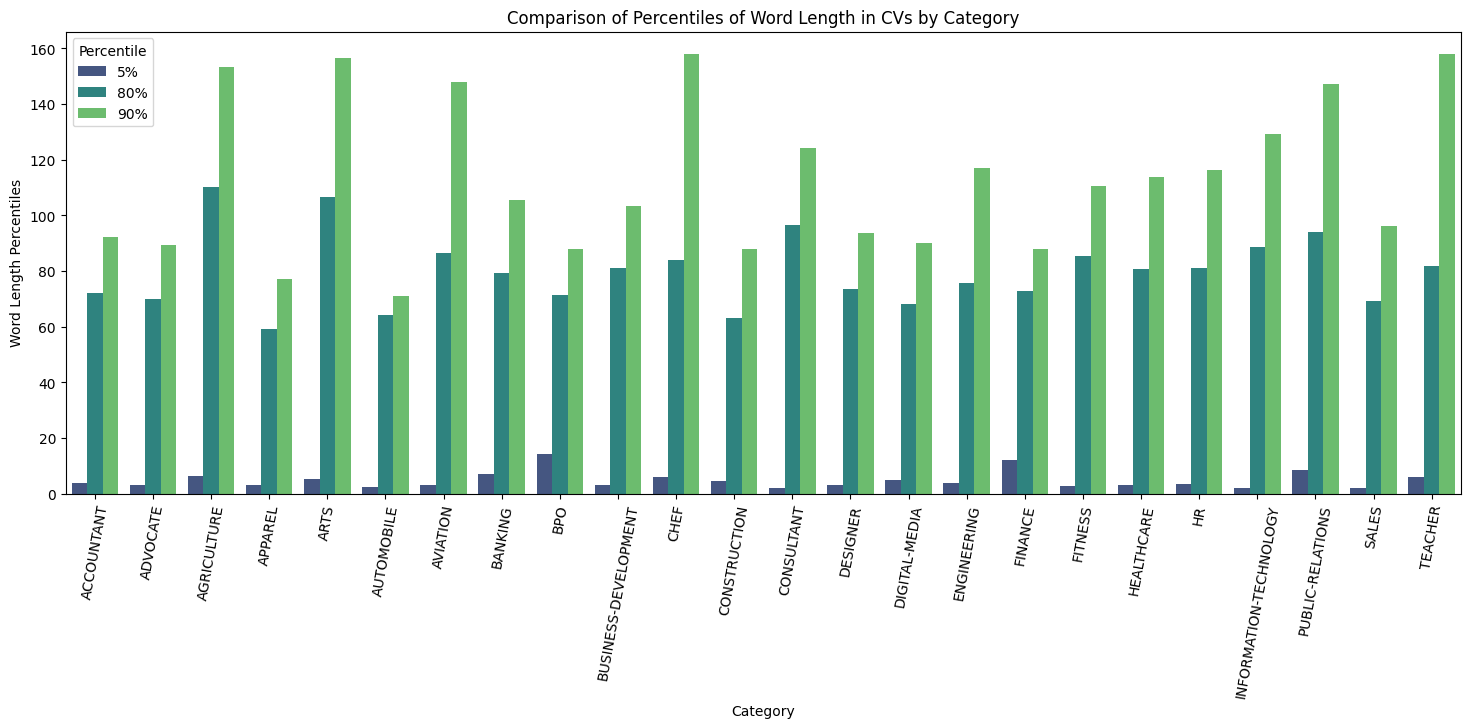

In [18]:
# Reshape the DataFrame to long format for easier plotting
stats_df_long = pd.melt(stats_df, id_vars=['Category'], value_vars=['5%', '80%', '90%'])

# Create a bar plot to compare percentiles of word length for each category
plt.figure(figsize=(18, 6))
sns.barplot(data=stats_df_long, x='Category', y='value', hue='variable', palette='viridis')

plt.title('Comparison of Percentiles of Word Length in CVs by Category')
plt.xticks(rotation=80)
plt.xlabel('Category')
plt.ylabel('Word Length Percentiles')
plt.legend(title='Percentile')
plt.show();

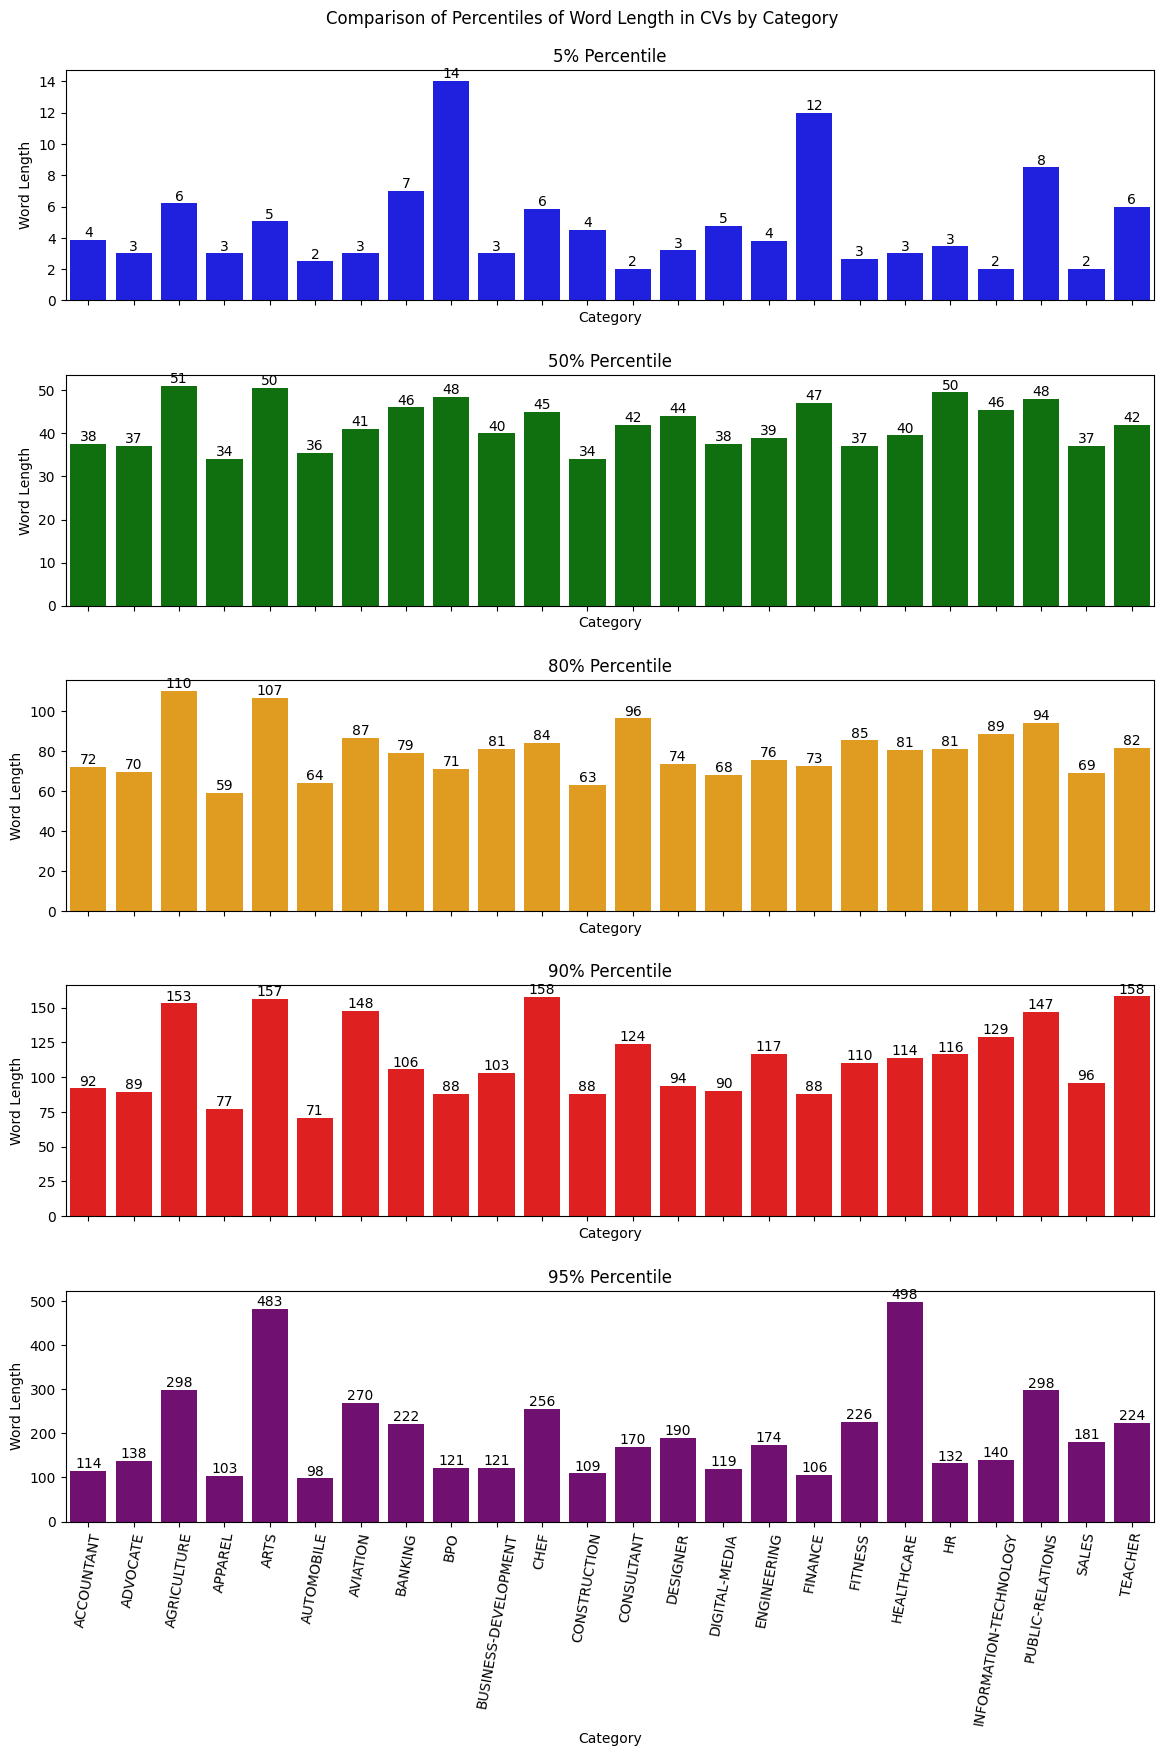

In [19]:
# Create a 5x1 subplot
fig, axes = plt.subplots(5, 1, figsize=(12, 18), sharex=True)

percentiles = ['5%', '50%', '80%', '90%', '95%']
colors = ['blue', 'green', 'orange', 'red', 'purple']

for i, percentile in enumerate(percentiles):
    # Create a bar plot for each percentile
    sns.barplot(data=stats_df, x='Category', y=percentile, color=colors[i], ax=axes[i])
    
    # Annotate the bars with actual values
    for index, row in stats_df.iterrows():
        value = row[percentile]
        axes[i].text(index, value, f'{round(value)}', ha='center', va='bottom', fontsize=10)

    axes[i].set_title(f'{percentile} Percentile')
    axes[i].set_ylabel('Word Length')

# Set the common x-axis label and rotate x-axis ticks
plt.xlabel('Category')
plt.xticks(rotation=80)
plt.suptitle('Comparison of Percentiles of Word Length in CVs by Category')

# Adjust spacing between subplots
plt.tight_layout(pad=2.0)

# Show the plots
plt.show();

## Same EDA on JD Data

In [20]:
from datasets import load_dataset

jd_data = load_dataset('jacob-hugging-face/job-descriptions', split="train")
jd_df = pd.DataFrame(jd_data)
jd_df.head()

,company_name,job_description,position_title,description_length,model_response
0,Google,minimum qualifications\nbachelors degree or eq...,Sales Specialist,2727,"{\n ""Core Responsibilities"": ""Responsible fo..."
1,Apple,description\nas an asc you will be highly infl...,Apple Solutions Consultant,828,"{\n ""Core Responsibilities"": ""as an asc you ..."
2,Netflix,its an amazing time to be joining netflix as w...,Licensing Coordinator - Consumer Products,3205,"{\n ""Core Responsibilities"": ""Help drive bus..."
3,Robert Half,description\n\nweb designers looking to expand...,Web Designer,2489,"{\n ""Core Responsibilities"": ""Designing webs..."
4,TrackFive,at trackfive weve got big goals were on a miss...,Web Developer,3167,"{\n ""Core Responsibilities"": ""Build and layo..."


In [21]:
jd_df['job_description'] = jd_df['job_description'].progress_apply(text_cleaning)

Progress Bar: 100%|████████████████████████████████████████████████████████████████| 853/853 [00:00<00:00, 1961.72it/s]


In [22]:
# A lot of position_title are present
jd_df.position_title.unique()

len(jd_df.position_title.unique())

725

In [23]:
# A lot of companies
jd_df.company_name.unique()

len(jd_df.company_name.unique())

853

### Comapring the word lengths in JDs and CVs

Though keep in mind, that number of JDs(=853) are less compared to CVs(=2469). So, results will be biased, this just for visulaization purposes.

In [24]:
# Analyzing Mean Word length(and Percentile wise) in Job Descriptions
jd_df['job_description'].str.split().str.len().describe(percentiles=[0.05,0.5,0.8,0.9,0.95])

count     853.000000
mean      482.649472
std       304.695458
min         3.000000
5%         82.200000
50%       441.000000
80%       702.000000
90%       849.800000
95%      1001.000000
max      3581.000000
Name: job_description, dtype: float64

In [25]:
# Analyzing Mean Word length(and Percentile wise) in extracted resumes
resume_df['CV'].str.split().str.len().describe(percentiles=[0.05,0.5,0.8,0.9,0.95])

count    2469.000000
mean       66.242608
std       110.373687
min         0.000000
5%          3.000000
50%        42.000000
80%        80.000000
90%       113.000000
95%       176.000000
max      1487.000000
Name: CV, dtype: float64

In [26]:
# Calculate word lengths and describe statistics for job descriptions
jd_word_lengths = jd_df['job_description'].str.split().str.len()
jd_stats = jd_word_lengths.describe(percentiles=[0.05, 0.5, 0.8, 0.9, 0.95]).drop(['std', 'min', 'max'])

# Calculate word lengths and describe statistics for CVs
resume_word_lengths = resume_df['CV'].str.split().str.len()
resume_stats = resume_word_lengths.describe(percentiles=[0.05, 0.5, 0.8, 0.9, 0.95]).drop(['std', 'min', 'max'])

# Create separate DataFrames for job descriptions and CVs
jd_df_stats = pd.DataFrame({
    'Type': 'Job Descriptions',
    'Statistic': jd_stats.index,
    'Value': jd_stats.values
})

resume_stats_df = pd.DataFrame({
    'Type': 'CVs',
    'Statistic': resume_stats.index,
    'Value': resume_stats.values
})

# Concatenate the DataFrames for plotting
comparison_df = pd.concat([jd_df_stats, resume_stats_df], ignore_index=True)
comparison_df

,Type,Statistic,Value
0,Job Descriptions,count,853.000000
1,Job Descriptions,mean,482.649472
2,Job Descriptions,5%,82.200000
3,Job Descriptions,50%,441.000000
4,Job Descriptions,80%,702.000000
5,Job Descriptions,90%,849.800000
6,Job Descriptions,95%,1001.000000
7,CVs,count,2469.000000
8,CVs,mean,66.242608
9,CVs,5%,3.000000


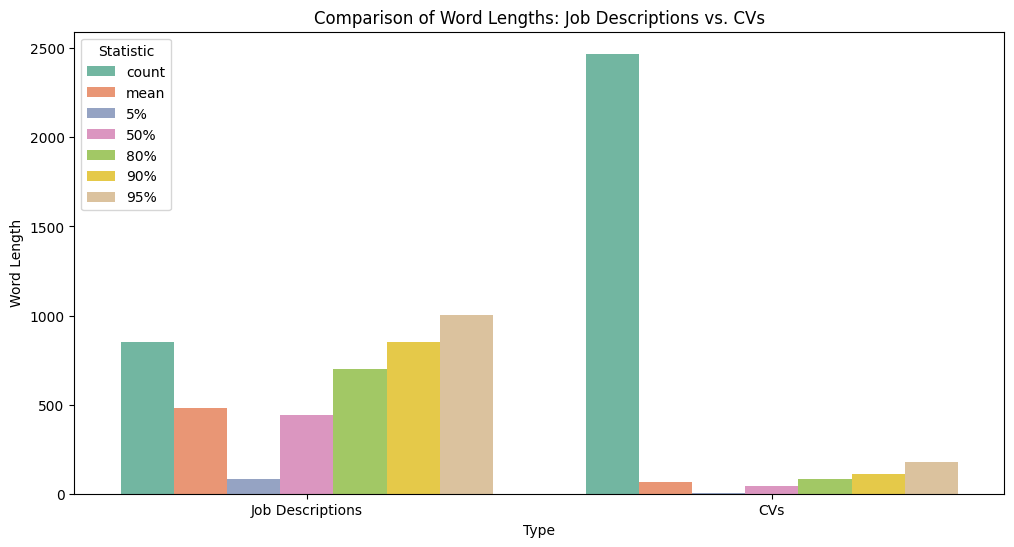

In [27]:
# Create a box plot to compare word lengths
plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_df, x='Type', y='Value', hue='Statistic', palette='Set2')


plt.title('Comparison of Word Lengths: Job Descriptions vs. CVs')
plt.xlabel('Type')
plt.ylabel('Word Length')
plt.legend(title='Statistic', loc='upper left')
plt.xticks(rotation=0)
plt.show();